## Conventions and notation:

We will only assume the libraries: `matplotlib`, `numpy`, and `scipy`.

We will assume Python 3.8.

----

In the rest of the notebook, the term `data matrix` refers to a two dimensional numpy array where instances are encoded as rows, e.g. a data matrix with 100 rows and 4 columns is to be interpreted as a collection of 100 instances (vectors) each of dimension four.

We will convert numpy `matrix` objects to numpy arrays when returning a data matrix since only arrays are acceptable, not  numpy `matrix` objects. 

In the rest of the notebook, the term `vector` refers to a **one** dimensional numpy array. 

When we explicitly use the term `column vector` we mean a two dimensional array of shape `(n,1)`, when we explicitly use the term `row vector` we mean a two dimensional vector of shape `(1,n)`.

When the term `distance` is used we mean the Euclidean distance.

----

If a required function can be implemented directly by a library function we will try to write our own implementation of the function: for example to implement a function to compute the `accuracy` we will not wrap the function `accuracy_score` from `sklearn.metrics` in a custom function; to implement the K-nearest_neighbor algorithm we will not wrap the function `KNeighborsClassifier` from `sklearn.neighbors` in a custom function.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
from typing import List, Tuple

## **Generating and Visualizing Synthetic Datasets for 1D Polynomial Regression**

---

**Objective:**

In this section we will implement three functions:

1. **`polynomial`**  
   This function will evaluate a polynomial at given input values using only basic NumPy operations (e.g., multiplication, addition, exponentiation).

2. **`generate_polynomial_data`**  
   This function generates synthetic 1D regression data based on a polynomial function with added Gaussian noise. It must use your `polynomial` function for computing the polynomial values. 

3. **`plot_regression_data`**  
   This function visualizes the generated data by plotting both the noisy data points and the true, noise-free polynomial curve (computed using our `polynomial` function). 

---

### Details for the functions

1. **`polynomial`:**
   - **Task:**  
     To implement the function `polynomial` that evaluates a polynomial for a given input array of values using only basic NumPy operations.
     
   - **Parameters:**
     - `p` (`np.ndarray`): A 1D NumPy array of polynomial coefficients, ordered from the coefficient of the highest degree term to the constant term.  
       For example, if 
       $
       p = \begin{bmatrix} a \\ b \\ c \end{bmatrix},
       $
       the polynomial represented is:
       $
       P(x) = a \cdot x^2 + b \cdot x + c.
       $
     - `x` (`np.ndarray`): The array of points at which to evaluate the polynomial.
     
   - **Returns:**
     - A NumPy array computed as:
       $
       P(x) = p_0 \cdot x^{n-1} + p_1 \cdot x^{n-2} + \dots + p_{n-1},
       $
       where $ n $ is the number of coefficients.
     
   **Important:** Do **not** use any built-in polynomial evaluation functions; use only basic NumPy operations (element-wise multiplication, exponentiation, and addition).

2. **`generate_polynomial_data`:**

   **Task:**  
   To implement the function `generate_polynomial_data` to create a synthetic dataset for a 1D regression problem using a polynomial model. This function should evaluate the polynomial at uniformly sampled x values and then add noise to the corresponding y values. The noise is added in an asymmetric manner: for each data point, decide uniformly at random whether to add or subtract noise. If noise is added, sample it from a normal distribution with mean 0 and a standard deviation of `pos_noise_std`. If noise is subtracted, sample it from a normal distribution with mean 0 and a standard deviation of `neg_noise_std`.

   **Parameters:**
   - **n_samples** (`int`): The number of data points to generate.
   - **polynomial_coeffs** (`np.ndarray`): A 1D NumPy array containing the polynomial coefficients, ordered from the coefficient of the highest degree term to the constant term.
   - **x_range** (`Tuple[float, float]`): A tuple `(x_min, x_max)` specifying the range from which to uniformly sample the x values.
   - **pos_noise_std** (`float`): The standard deviation of the Gaussian noise to be added when noise is applied in the positive direction.
   - **neg_noise_std** (`float`): The standard deviation of the Gaussian noise to be subtracted when noise is applied in the negative direction.
   - **poly_func** (`callable`): A function that evaluates the polynomial at given x values. (For this assignment, this will be your `polynomial` function.)
   - **random_seed** (`Optional[int]`): An optional integer seed for the random number generator to ensure reproducibility (default is `None`).

   **Returns:**
   - **x** (`np.ndarray`): A 1D NumPy array of shape `(n_samples,)` containing the generated x values.
   - **y** (`np.ndarray`): A 1D NumPy array of shape `(n_samples,)` containing the y values computed as follows:
     
     $$
     y = \text{poly\_func}(\text{polynomial\_coeffs}, x) + \text{noise},
     $$
     
     where, for each data point, the noise is drawn from a normal distribution with mean 0 and standard deviation `pos_noise_std` if adding noise, or drawn from a normal distribution with mean 0 and standard deviation `neg_noise_std` if subtracting noise. The decision to add or subtract the noise is made uniformly at random for each sample.

3. **`plot_regression_data`:**
   - **Task:**  
     To implement the function `plot_regression_data` that visualizes the regression data.
     
   - **Parameters:**
     - `x` (`np.ndarray`): A 1D NumPy array of x values.
     - `y` (`np.ndarray`): A 1D NumPy array of y values corresponding to the noisy data.
     - `polynomial_coeffs` (`np.ndarray`): A 1D NumPy array of the coefficients of the true polynomial function.
     - `poly_func` (callable): The student-defined polynomial evaluation function (i.e., `polynomial`).
     - `title` (str): A title for the plot.
     - `fig_size` (Tuple[int, int]): The size of the figure (e.g., `(8, 6)`).
     
   - **Returns:**
     - A plot displaying:
       - A scatter plot of the noisy data points.
       - A line plot of the true polynomial curve (computed without noise using `poly_func` over a dense set of x values).
     - The plot will include appropriate axis labels, a legend that distinguishes between the noisy data and the true curve, and the given title.

---

**Note:**
- Use the `numpy` library for all numerical operations.
- Use the `matplotlib` library for creating the visualization.
- When generating the dataset in `generate_polynomial_data`, ensure that the x values are uniformly sampled from the specified `x_range` and that noise is added correctly.
- The function `plot_regression_data` should clearly show both the scattered noisy data and the continuous, noise-free polynomial curve.

---


In [2]:

def polynomial(p: np.ndarray, x: np.ndarray) -> np.ndarray:
    y = np.array([])
    for i in x:
        temp = 0
        for j in range(len(p)):
            temp += p[j]* (i** (len(p) -1 -j))
        y = np.append(y, temp)

    return(y)

def generate_polynomial_data(n_samples: int, 
                             polynomial_coeffs: np.ndarray, 
                             x_range: tuple, 
                             pos_noise_std: float, 
                             neg_noise_std: float, 
                             poly_func: callable, 
                             random_seed: int = None) -> (np.ndarray, np.ndarray):
    
    #defining the random seed to make the data generation consistent:
    np.random.seed(random_seed)
    
    #First getting the x array using numpy.random.uniform()
    x = np.random.uniform(x_range[0], x_range[1], size = (n_samples,))
    y = poly_func(polynomial_coeffs, x)

    #adding noise to the data:
    for i in range(len(y)):
        #Defining noise, with positive and negative standard deviations:
        if np.random.rand() > 0.5:
            y[i] += np.abs(np.random.normal(0, pos_noise_std,))
        else:
            y[i] -= np.abs(np.random.normal(0, neg_noise_std,))

    
    return x, y

def plot_regression_data(x: np.ndarray, 
                         y: np.ndarray, 
                         polynomial_coeffs: np.ndarray, 
                         poly_func, 
                         title: str, 
                         fig_size: tuple):
    
    #getting the calculated y(without noise from the polynomial function) for the given x:
    x1 = np.sort(x)
    y1 = poly_func(polynomial_coeffs, x1)

    #defining the plot size
    plt.figure(figsize = fig_size)

    #plotting the true y values against x:
    plt.scatter(x, y, s=20, color = 'blue', label = 'Noisy data', alpha = 0.65)

    #plotting the polynomial curve:
    plt.plot(x1, y1, color = 'r', linewidth = 1, label = 'True polynomial')
    
    plt.title(title)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.show()

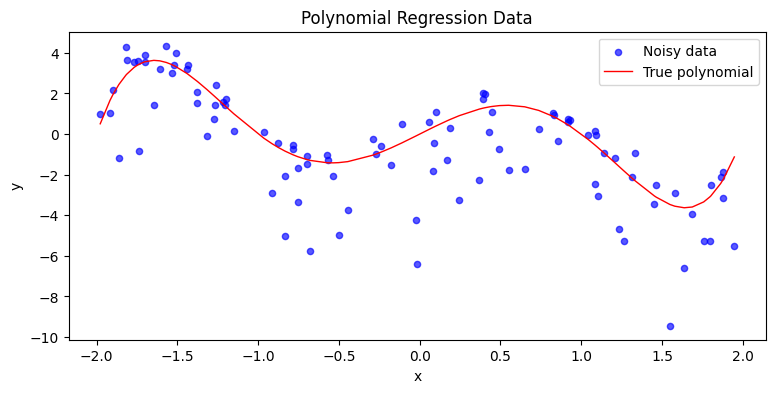

In [3]:
#Testing the above implementation
coeffs = np.array([1, 0, -5, 0, 4, 0])
n_samples = 100
x_range = (-2, 2)
pos_noise_std = 0.5
neg_noise_std = 2.5
random_seed = 42
x, y = generate_polynomial_data(n_samples, coeffs, x_range, pos_noise_std, neg_noise_std, polynomial, random_seed)
plot_regression_data(x, y, coeffs, polynomial, "Polynomial Regression Data", (9, 4))

## Implementing Loss Functions



**Implementing Different Loss Functions for Machine Learning**

---

**Objective:**

We will implement several loss functions that are widely used to quantify the error between predicted values and true targets. We will implement the following five functions using only basic NumPy operations (such as arithmetic operators, exponentiation, logarithms, and maximum):

1. **Mean Squared Error (MSE) Loss**  
2. **Mean Absolute Error (MAE) Loss**  
3. **Hinge Loss**  
4. **Log Loss (Binary Cross-Entropy Loss)**  
5. **Linex Loss (Asymmetric Loss)**

We will use only basic operations provided by NumPy; no built-in loss functions from higher-level libraries.

---

### Details for implementation

For each loss function, we will implement the function following the description below. The function should accept the specified parameters (listed with their types) and return a single float value representing the computed loss.

**Expected Behavior:**
   - Return the average (mean) of the individual errors.

1. **Mean Squared Error (MSE) Loss**  

   **Parameters:**
   - **y_true** (`np.ndarray`): A 1D NumPy array of true target values.
   - **y_pred** (`np.ndarray`): A 1D NumPy array of predicted values.


2. **Mean Absolute Error (MAE) Loss**  

   **Parameters:**
   - **y_true** (`np.ndarray`): A 1D NumPy array of true target values.
   - **y_pred** (`np.ndarray`): A 1D NumPy array of predicted values.


3. **Hinge Loss**  

   **Parameters:**
   - **y_true** (`np.ndarray`): A 1D NumPy array of true labels. (The values are expected to be either -1 or 1.)
   - **y_pred** (`np.ndarray`): A 1D NumPy array of predicted scores (real-valued).


4. **Log Loss (Binary Cross-Entropy Loss)** 

   **Parameters:**
   - **y_true** (`np.ndarray`): A 1D NumPy array of true binary labels (0 or 1).
   - **y_pred** (`np.ndarray`): A 1D NumPy array of predicted probabilities (each value should be between 0 and 1).
   - **eps** (`float`, default value: 1e-15): A small constant to ensure numerical stability (avoid taking the logarithm of zero).

5. **Asymmetric linear-exponential (LINEX) loss function**
 
In the symmetric loss function, the estimation treats overestimation and underestimation equally, whereas the asymmetric loss function gives different weights to overestimation and underestimation. Compared with the symmetric loss, the asymmetric loss is more realistic and useful in practical applications.

Reference: Nassar, M., R. Alotaibi, H. Okasha, and L. Wang. Bayesian Estimation Using Expected LINEX Loss Function: A Novel Approach with Applications. Mathematics 2022, 10, 436. 2022.  [Link to article](https://www.mdpi.com/2227-7390/10/3/436)

   **Parameters:**
   - **y_true** (`np.ndarray`): A 1D NumPy array of true target values.
   - **y_pred** (`np.ndarray`): A 1D NumPy array of predicted values.
   - **a** (`float`, default value: 1.0): The asymmetry parameter.  
     - If `a > 0`, the function penalizes overestimation more severely.
     - If `a < 0`, underestimation is penalized more.
   - **reduction** (`str`, default value: "mean"): Specifies how to reduce the loss:
     - If `"mean"`, return the average loss.
     - If `"sum"`, return the sum of the losses.

   **Expected Behavior:**
   - Compute the error for each sample as $ e_i = y_{\text{pred}_i} - y_{\text{true}_i} $.
   - For each sample, compute the loss using the Linex formula:  
     $$
     L(e_i) = \exp\left(a \cdot e_i\right) - a \cdot e_i - 1.
     $$
   - Depending on the `reduction` parameter, either return the average of all $ L(e_i) $ (if `"mean"`) or the total sum (if `"sum"`).


In [4]:

def mse_loss(y_true: np.ndarray, y_pred: np.ndarray) -> float:

    #getting the difference:
    diff = y_true - y_pred
    mse = np.sum((diff ** 2))/ len(y_true)

    return mse


def mae_loss(y_true: np.ndarray, y_pred: np.ndarray) -> float:
    diff = y_true - y_pred
    mae = np.sum(np.absolute(diff))/ len(y_true)

    return mae


def hinge_loss(y_true: np.ndarray, y_pred: np.ndarray) -> float:
    hloss = np.maximum(0, 1 - (y_true * y_pred))
    avg_hloss = np.sum(hloss)/ len(hloss)
    
    return avg_hloss


def log_loss(y_true: np.ndarray, y_pred: np.ndarray, eps: float = 1e-15) -> float:
    y_pred = np.clip(y_pred, eps, 1 - eps)
    
    #calculating log loss for each value:
    loss = -1 * ( (y_true * np.log(y_pred)) + ((1 - y_true) * np.log(1 - y_pred)) )

    #calculating total log loss across all values:
    logloss = np.sum(loss) / len(loss)

    return logloss


def linex_loss(y_true: np.ndarray, y_pred: np.ndarray, a: float = 1.0, reduction: str = "mean") -> float:

    #computing the loss for each value:
    e = y_pred - y_true
    loss = np.exp(a * e) - (a * e) - 1

    #sum or mean:
    if reduction == 'mean':
        linex_loss = np.sum(loss) / len(e)
    else:
        linex_loss = np.sum(loss)

    return linex_loss

## Fitting a Polynomial using Optimization

<div style="text-align: right"><b>[10 marks]</b></div>

**Optimizing a Polynomial Fit with `scipy.optimize.minimize`**

---

**Objective:**

We will use the `scipy.optimize.minimize` function to optimize a polynomial fit. The goal is to adjust the coefficients of a polynomial so that the output of your model best fits the given data, as measured by a user-defined loss function.

---

### Explanation of `scipy.optimize.minimize`

The `scipy.optimize.minimize` function is a general-purpose optimizer that finds the minimum of a scalar-valued function. See documentation [here](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html).
Its key components are:

- **objective:**  
  A function that takes an array of parameters and returns a single scalar value representing the cost (or loss). In this task, the objective function computes the loss between the observed data and the predictions of your polynomial model.

- **initial_guess:**  
  A NumPy array that provides the starting point for the optimization. For a polynomial of degree `n`, you will have `n + 1` coefficients.

- **method:**  
  The algorithm used for optimization (for example, `"BFGS"` is suitable for many smooth, unconstrained problems).

- **Result Object:**  
  The output of `minimize` is an object containing:
  - `result.x`: A NumPy array with the optimized coefficients.
  - `result.success`: A Boolean flag indicating if the optimization was successful.
  - `result.message`: A message describing the termination status (useful for debugging).

---

### Task: Implement `fit_polynomial`

Task is to implement the function `fit_polynomial` with the following inputs:

- **x** (`np.ndarray`): A 1D NumPy array containing the independent variable values.
- **y** (`np.ndarray`): A 1D NumPy array containing the observed dependent variable values.
- **degree** (`int`): The degree of the polynomial you wish to fit.
- **loss_fn** (`callable`): A user-defined loss function that computes the error between the predicted values and the true values. It accepts two NumPy arrays (`y_true` and `y_pred`) and returns a float.
- **poly_func** (`callable`): A function that evaluates a polynomial at given x values. It takes a NumPy array of coefficients (ordered from highest degree term to constant term) and a NumPy array of x values, and returns the predicted y values.

---

### Expected Output

When your `fit_polynomial` function is called, it should return a NumPy array containing the optimized polynomial coefficients. These coefficients should:

- Be returned as a 1D NumPy array of length `degree + 1`.
- Be arranged in descending order of power (i.e., the first element is the coefficient for $ x^{\text{degree}} $ and the last element is the constant term).
- Represent the set of coefficients that minimizes the loss function when the polynomial is evaluated at the provided x values and compared to the observed y values.

For example, if you fit a polynomial of degree 2 (a quadratic) to some data, the output might look like:

```python
array([a, b, c])
```

which corresponds to the polynomial:
$$
P(x) = a \cdot x^2 + b \cdot x + c.
$$

The quality of the fit is measured by the loss function you provide; therefore, the lower the returned loss, the better the polynomial fits the data.

---


In [5]:

def fit_polynomial(x: np.ndarray, y: np.ndarray, degree: int, loss_fn: callable, poly_func: callable) -> np.ndarray:

    #a function to give the loss to be later minimized by optimize() function:
    def objective_fun(coefficients: np.ndarray):
        
        y_pred = poly_func(coefficients, x)
        
        loss = loss_fn(y, y_pred)
        
        return loss

    #initializing first guess to be an arrays of all 0's:
    first_guess = np.zeros(degree + 1)

    #minimizing the loss using the optimize() method:
    result = sp.optimize.minimize(objective_fun, first_guess)
    
    return result.x

## Visualizing Residuals on Test Data

**Plotting Residuals on Test Data After a Train-Test Split**

---

**Objective:**

In regression tasks, analyzing residuals—the differences between the true target values and the predictions—helps uncover issues such as bias or non-constant variance. In this exercise, you will implement a function named **`plot_residuals`** that performs the following steps:

1. **Train-Test Split:**  
   Internally split the provided dataset into a training set (70%) and a test set (30%) in a reproducible manner using an optional random seed.

2. **Model Fitting:**  
   Fit a polynomial model on the training data using a provided loss function (`loss_fn`) and a polynomial evaluation function (`poly_func`). (You may assume that a helper function `fit_polynomial` is available.)

3. **Prediction and Loss Computation:**  
   Use the fitted model to predict the target values on the test set and compute the average loss on the test data using the Mean Squared Error (MSE) loss function (i.e., `mse_loss`). This average loss should be appended to the plot title.

4. **Plotting:**  
   - Generate a dense set of x values spanning the range of the test data for a smooth curve of the fitted polynomial.
   - Plot the fitted polynomial as a smooth blue line.
   - Plot the true test data as green scatter points.
   - Draw vertical dashed red lines connecting each test x value’s predicted value to its corresponding true value.
   - Label the x-axis as `"x"` and the y-axis as `"y"`.
   - Set the plot title to include both the provided title and the computed average MSE loss.
   - Include a legend to distinguish the fitted function, true data, and residuals.

---

### Detailed Instructions

Implement a function named **`plot_residuals`** with the following parameters:

- **x** (`np.ndarray`): A 1D NumPy array of independent variable values.
- **y_true** (`np.ndarray`): A 1D NumPy array of true target values.
- **degree** (`int`): The degree of the polynomial to be fitted.
- **loss_fn** (`callable`): A loss function used to fit the polynomial on the training data.
- **poly_func** (`callable`): A function to evaluate the polynomial at given x values. This function should take a NumPy array of coefficients (ordered from highest degree to constant) and a NumPy array of x values.
- **title** (`str`): A string representing the title of the plot.
- **fig_size** (`tuple` of two ints): A tuple specifying the figure size (e.g., `(8, 6)`).
- **random_seed** (`int`, optional): An optional seed to ensure reproducibility of the train-test split.

**Expected Behavior:**

- **Data Splitting:**  
  Internally split the data into training (70%) and test (30%) sets in a reproducible way (using the provided `random_seed`).

- **Fitting and Prediction:**  
  Fit the polynomial on the training data using `fit_polynomial` (which accepts `loss_fn` and `poly_func` as inputs). Then, compute predictions on the test data.

- **Loss Computation:**  
  Compute the average MSE loss on the test set using `mse_loss` (regardless of the provided `loss_fn`). Append this loss value (formatted to 4 decimal places) to the plot title.

- **Plotting:**  
  - Generate a dense set of x values over the range of the test data and compute the corresponding y values for a smooth curve.
  - Plot the fitted polynomial as a blue line.
  - Plot the true test data as green scatter points.
  - Draw vertical dashed red lines from each test x value's predicted value to its true value.
  - Label the axes, set the plot title (including the test average MSE loss), and add a legend.
  - Display the plot.


In [6]:

def plot_residuals(x: np.ndarray, y_true: np.ndarray, degree: int, loss_fn: callable, poly_func: callable, title: str, fig_size: tuple, random_seed: int = 42):
    
    #train-Test split:
    def train_test_split(x: np.array, y: np.array, train_size: int, random_seed: int):
    
        train_set = train_size
    
        train_size = int(len(x) * train_set/100)
    
        np.random.seed(random_seed)
        indexes = np.random.permutation(len(x))
    
        train_index = indexes[:train_size]
        test_index = indexes[train_size:] 
    
        X_train = x[train_index]
        y_train = y[train_index]
        X_test = x[test_index]
        y_test = y[test_index]
    
        return X_train, y_train, X_test, y_test

    X_train, y_train, X_test, y_test = train_test_split(x, y_true, 70, random_seed)
    

    #storing the optimised coeficients:
    result = fit_polynomial(X_train, y_train, degree, loss_fn, poly_func)
    
    #prediction and Loss computation    
    # 1. Prediction:
    y_test_pred = poly_func(result, X_test)

    # 2. Loss Computation on test set
    loss = mse_loss(y_test, y_test_pred)
    
    #Adding this calculated loss to the title:
    new_title = f"{title} (Test Avg MSE Loss: {loss:.4f})"
    
    #Smooth polynomial curve:
    x_dense = np.linspace(X_test.min(), X_test.max(), 300)
    y_dense_pred = poly_func(result, x_dense)
    
    plt.figure(figsize = fig_size)

    #plot Scattered points:
    plt.scatter(X_test, y_test, s=15, color = 'green', label = 'True test data', alpha = 0.75) 
    
    #plot Polynomial line:
    plt.plot(x_dense, y_dense_pred, color='b', linewidth=1.5, label='Fitted Function')

    #plotting verticle lines:
    for i in range(len(y_test)):
        plt.plot([X_test[i], X_test[i]], [y_test[i], y_test_pred[i]], linestyle = '--', color = "red")
    
    plt.title(new_title)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    
    
    plt.show()

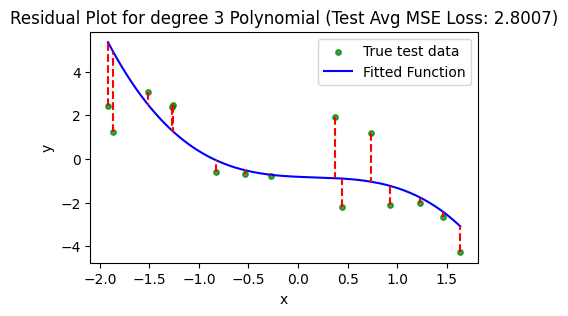

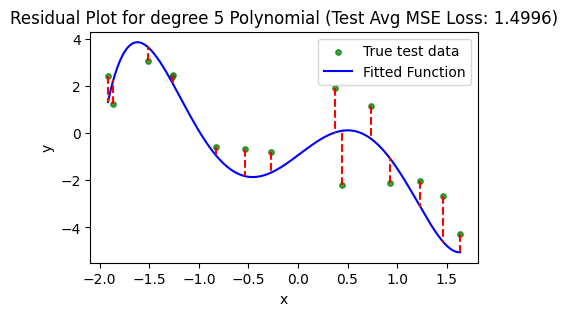

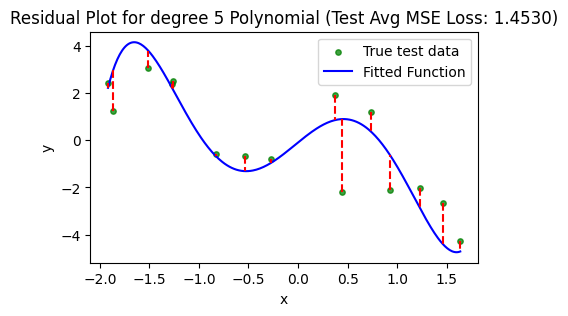

In [7]:
#Checkpoint to visualize the implementation so far
coeffs = np.array([1, 0, -5, 0, 4, 0])
n_samples = 50
x_range = (-2, 2)
pos_noise_std = 0.5
neg_noise_std = 2.5
random_seed = 42
x, y = generate_polynomial_data(n_samples, coeffs, x_range, pos_noise_std, neg_noise_std, polynomial, random_seed)

degree = 3
loss_fn = mse_loss
poly_func=polynomial
plot_residuals(x, y, degree, loss_fn, poly_func, f"Residual Plot for degree {degree} Polynomial", (5, 3))

degree = 5
plot_residuals(x, y, degree, loss_fn, poly_func, f"Residual Plot for degree {degree} Polynomial", (5, 3))

def aloss(y_true: np.ndarray, y_pred: np.ndarray):
    return linex_loss(y_true, y_pred, a=-1.1)

degree = 5
plot_residuals(x, y, degree, aloss, poly_func, f"Residual Plot for degree {degree} Polynomial", (5, 3))


## Implement a Polynomial Estimator Class

**Implementing a Polynomial Estimator Class**

---

**Objective:**

We will implement a Python class, **`PolynomialEstimator`**, that encapsulates the process of fitting and predicting using a polynomial regression model. The estimator will be initialized with a specified polynomial degree and a loss function. Internally, it will use the provided functions **`fit_polynomial`** and **`polynomial`** to perform the model fitting and prediction, respectively.

---

### Detailed Instructions

We are required to implement the class **`PolynomialEstimator`** with the following specifications:

1. **Constructor (`__init__`):**  
   - **Task:**  
     Create an `__init__` method that accepts the following parameters:
     - **`degree`** (`int`): The degree of the polynomial model.
     - **`loss_func`** (`callable`): A loss function used to measure the error between predicted and true values.
     - **`poly_func`** (`callable`): The polynomial evaluation function with the signature:
       ```python
       def polynomial(p: np.ndarray, x: np.ndarray) -> np.ndarray:
       ```
       This function evaluates the polynomial at given x values using the coefficients.
     
   - **Requirements:**  
     - Store the provided `degree`, `loss_func`, and `poly_func` as instance variables.
     - Initialize an instance variable (e.g., `self.coeffs`) to store the optimized polynomial coefficients once the model is fitted.

2. **Method `fit`:**  
   - **Task:**  
     Implement the `fit` method with the following signature:
     ```python
     def fit(self, x: np.ndarray, y: np.ndarray) -> None:
     ```
     This method fits the polynomial model to the training data.
     
   - **Implementation Details:**  
     - Use the provided function **`fit_polynomial`** to compute the optimized coefficients.  
     - Store the returned coefficients in an instance variable (e.g., `self.coeffs`).

3. **Method `predict`:**  
   - **Task:**  
     Implement the `predict` method with the following signature:
     ```python
     def predict(self, x: np.ndarray) -> np.ndarray:
     ```
     This method uses the fitted model to predict outputs for given input values.
     
   - **Implementation Details:**  
     - Ensure that the model has been fitted (i.e., `self.coeffs` is available, raise **ValueError** if not).  
     - Return the predicted values.

In [8]:

class PolynomialEstimator:
    """
    A polynomial regression estimator that uses a specified degree and loss function.
    It fits a polynomial model using the provided fit_polynomial function and
    makes predictions using the provided polynomial function.
    """
    
    def __init__(self, degree: int, loss_func: callable, poly_func: callable):
        """
        Constructor for the PolynomialEstimator.

        Parameters:
            degree (int): The degree of the polynomial model.
            loss_func (callable): A loss function used to measure the error between predicted and true values.
            poly_func (callable): A function to evaluate the polynomial given coefficients and x values.
        """
        self.degree = degree
        self.loss_func = loss_func
        self.poly_func = poly_func
        self.coeffs = None

    def fit(self, x: np.ndarray, y: np.ndarray) -> None:
        """
        Fit the polynomial model to the training data.

        Parameters:
            x (np.ndarray): 1D array of independent variable values.
            y (np.ndarray): 1D array of dependent variable (target) values.
        """
        
        self.coeffs = fit_polynomial(x, y, self.degree, self.loss_func, self.poly_func)
        

    def predict(self, x: np.ndarray) -> np.ndarray:
        """
        Predict the output values for given input values using the fitted model.

        Parameters:
            x (np.ndarray): 1D array of independent variable values for prediction.

        Returns:
            np.ndarray: Predicted dependent variable values.
        """
        
        if self.coeffs is None:
            raise ValueError("Coefficients unavailable!")
        
        y_pred = self.poly_func(self.coeffs, x)

        return y_pred

## Bootstrap Samples with Out‐of‐Bag Data for Bias–Variance Analysis

**Creating Bootstrap Samples with Out‐of‐Bag Data for Bias–Variance Analysis**

---

**Objective:**

We will implement a function to create bootstrap samples from a given 1D dataset and also determine the out‐of‐bag (OOB) samples for each bootstrap sample. Bootstrap sampling is a key technique for estimating the bias and variance of a model by resampling with replacement from the original data. The OOB samples provide a means of validating the model on data that were not used in training the bootstrap sample.

---

### Detailed Instructions

To implement the function **`create_bootstrap_samples`** with the following requirements:

- **Task:**  
  Write a function that takes as input the feature array `x`, target array `y`, and an integer `num_bootstrap` indicating the number of bootstrap samples to generate. For each bootstrap sample, the function should:
  1. Randomly sample, with replacement, from the original data such that each bootstrap sample has the same size as the original dataset.
  2. Determine the out‐of‐bag (OOB) samples—that is, the instances from the original dataset that were **not** selected in the bootstrap sample.

- **Parameters:**
  - **x** (`np.ndarray`): A 1D NumPy array of shape `(n_samples,)` containing the independent variable values.
  - **y** (`np.ndarray`): A 1D NumPy array of shape `(n_samples,)` containing the corresponding target values.
  - **num_bootstrap** (`int`): The number of bootstrap samples to generate.

- **Returns:**
  - A list of tuples, where each tuple is of the form `(bootstrap_x, bootstrap_y, oob_x, oob_y)`:
    - **bootstrap_x** (`np.ndarray`): A 1D NumPy array of shape `(n_samples,)` containing the resampled x values.
    - **bootstrap_y** (`np.ndarray`): A 1D NumPy array of shape `(n_samples,)` containing the corresponding resampled y values.
    - **oob_x** (`np.ndarray`): A 1D NumPy array containing the x values that were **not** selected in the bootstrap sample.
    - **oob_y** (`np.ndarray`): A 1D NumPy array containing the corresponding y values for the out‐of‐bag samples.

In [9]:

def create_bootstrap_samples(x: np.ndarray, y: np.ndarray, num_bootstrap: int) -> List[Tuple[np.ndarray, np.ndarray, np.ndarray, np.ndarray]]:
    """
    Creates a list of bootstrap samples from the given dataset along with the corresponding out‐of‐bag (OOB) samples.
    
    Parameters:
        x (np.ndarray): A 1D NumPy array of shape (n_samples,) containing the independent variable values.
        y (np.ndarray): A 1D NumPy array of shape (n_samples,) containing the corresponding target values.
        num_bootstrap (int): The number of bootstrap samples to generate.
    
    Returns:
        List[Tuple[np.ndarray, np.ndarray, np.ndarray, np.ndarray]]: A list of tuples, where each tuple is of the form:
            (bootstrap_x, bootstrap_y, oob_x, oob_y)
            - bootstrap_x (np.ndarray): Resampled x values (shape (n_samples,)).
            - bootstrap_y (np.ndarray): Corresponding resampled y values (shape (n_samples,)).
            - oob_x (np.ndarray): x values not selected in the bootstrap sample.
            - oob_y (np.ndarray): Corresponding y values for the out‐of‐bag samples.
    """
    #function to generate an array with random indices:
    def random_indices(size: int) -> np.ndarray:
        return np.random.randint(0, size, size)

    #list holding the tuples
    final_list = []

    #creating and appending tuples
    for i in range(num_bootstrap):
        indices_bootstrap = random_indices(len(x))

        #getting unique index from indices_bootstrap:
        bootstrap_set = set(indices_bootstrap)

        #getting bootstrap indices:
        indices_oob = np.array([j for j in range(len(x)) if j not in bootstrap_set])
        
        bootstrap_x = x[indices_bootstrap]
        bootstrap_y = y[indices_bootstrap]
        oob_x = x[indices_oob]
        oob_y = y[indices_oob]

        final_list.append((bootstrap_x, bootstrap_y, oob_x, oob_y))

    return final_list

## Estimating Bias and Variance

**Estimating Bias and Variance via Bootstrap Sampling with Out‐of‐Bag Testing**

---

**Objective:**

To implement the function **`bias_variance_estimate`** to compute the bias and variance of a polynomial regression model’s predictions using bootstrap sampling with OOB testing. In this approach, for each bootstrap sample, a new instance of the provided `PolynomialEstimator` is fitted on the resampled data and evaluated on the corresponding OOB samples. The bias and variance for each training instance are computed by aggregating the OOB predictions over all trials.

---

### Detailed Instructions

To implement **`bias_variance_estimate`** so that it:

1. **Generates Bootstrap Samples:**  
   Use your bootstrapping routine (e.g., your implementation of `create_bootstrap_samples`) to generate a specified number of bootstrap samples from the training data. Each sample should include both the resampled data and its corresponding OOB samples.

2. **Fits and Evaluates the Model:**  
   For each bootstrap sample, create a new instance of the provided `PolynomialEstimator`, fit it on the bootstrap data, and obtain predictions on the OOB data.

3. **Aggregates Predictions:**  
   For each training instance, collect all OOB predictions from the trials in which that instance was OOB.

4. **Computes Statistics:**  
   For every training instance, compute:
   - The mean of the aggregated OOB predictions,
   - The bias (as the squared difference between the true target value and the mean prediction),
   - The variance of the OOB predictions.

If an instance never appears in the OOB samples, assign `np.nan` for its statistics.

---

**Parameters:**

- **x** (`np.ndarray`): A 1D array of training input values.
- **y** (`np.ndarray`): A 1D array of training target values.
- **estimator** (`PolynomialEstimator`): An already initialized instance of the `PolynomialEstimator` class.
- **num_trials** (`int`): The number of bootstrap samples to use.

---

**Returns:**

- **mean_predictions** (`np.ndarray`): A 1D array (length equal to the number of training instances) containing the mean OOB prediction for each instance.
- **bias** (`np.ndarray`): A 1D array with the bias (squared error) for each instance.
- **variance** (`np.ndarray`): A 1D array with the variance of the OOB predictions for each instance.

---

In [10]:
import numpy as np
from typing import Tuple

def bias_variance_estimate(x: np.ndarray,
                           y: np.ndarray,
                           estimator,  # an initialized instance of PolynomialEstimatores
                           num_trials: int) -> Tuple[np.ndarray, np.ndarray, np.ndarray]:
    """
    Estimates the bias and variance for each training instance using bootstrap sampling
    with out-of-bag (OOB) testing.

    Parameters:
        x (np.ndarray): 1D array of training input values (assumed unique).
        y (np.ndarray): 1D array of training target values.
        estimator: An initialized instance of PolynomialEstimator.
        num_trials (int): Number of bootstrap samples (trials) to use.

    Returns:
        mean_predictions (np.ndarray): 1D array of length n_samples with the mean OOB
                                       prediction for each instance.
        bias (np.ndarray): 1D array of length n_samples with the bias (squared error)
                           for each instance.
        variance (np.ndarray): 1D array of length n_samples with the variance of the OOB
                               predictions for each instance.
    """

    # mean, bias and variance of all the instances.
    mean = np.zeros(len(x))
    bias = np.zeros(len(x))
    variance = np.zeros(len(x))
    
    #generating the samples:
    samples = create_bootstrap_samples(x, y, num_trials)
    
    model_outcomes = []
    #Fitting and Evaluatting model for each sample:
    for i in range(num_trials):

        #creating a new instance of the estimator:
        trial_estimator = PolynomialEstimator(estimator.degree, estimator.loss_func, estimator.poly_func)

        #unpacking tuple and assigning the arrays to bootstrap and oob variables:
        bootstrap_x, bootstrap_y, oob_x, oob_y = samples[i]
        
        #fitting the model on bootstrap data
        trial_estimator.fit(bootstrap_x, bootstrap_y)
    
        #storing the prediction obtained on OOB data
        y_pred = trial_estimator.predict(oob_x)

        model_outcomes.append((oob_x, y_pred))

    
    #a list of arrays that will store all the oob_x across samples:
    oob_x_arrays = []
    for i in range(len(model_outcomes)):
        oob_x, pred = model_outcomes[i]
        oob_x_arrays.append(oob_x)
    
    #a list of arrays that will store all the predictions across samples:
    predictions = []
    for i in range(len(model_outcomes)):
        oob_x, pred = model_outcomes[i]
        predictions.append(pred)
    
    #making a single numpy array for OOB x values:
    total_oob_x = np.concatenate(oob_x_arrays, axis = 0)
    
    #making a single numpy array for all predictions corresponding to oob_x:
    total_predictions = np.concatenate(predictions, axis = 0)
    
    #creating a dictionary to combine all the predictions for each x in oob:
    oob_dict = {}
    
    for i in range(len(total_oob_x)):
        x_value = float(total_oob_x[i])
        pred = float(total_predictions[i])
    
        #checking if x is present already:
        if x_value in oob_dict:
            oob_dict[x_value].append(pred)
        else:
            oob_dict[x_value] = [pred]

    for i, xi in enumerate(x):
        if xi in oob_dict:
            values = np.array(oob_dict[xi])
    
            #calculating & appending mean:
            instance_mean = np.mean(values)
            mean[i] = instance_mean
    
            #Calculating and appending Bias:
            instance_bias = (y[i] - instance_mean) ** 2
            bias[i] = instance_bias
    
            #calcualting and appending variance:
            instance_variance = np.mean((values - instance_mean) **2)
            variance[i] = instance_variance
            
        else:
            #appending np.nan for the statistics:
            mean[i] = np.nan
            bias[i] = np.nan
            variance[i] = np.nan

    return (mean, bias, variance)

## Compare Two Polynomial Regression Models

**Comparing Two Polynomial Regression Models via Bootstrap Sampling**

---

**Objective:**

Using training data (X, y), implement a function that uses bootstrap sampling to evaluate two polynomial regression models—represented by two initialized instances of the `PolynomialEstimator` class. One model is intended to be underfit  and the other overfit. Your function should use bootstrap sampling with out‐of‐bag (OOB) data to compute bias variance information for each model. Finally, based on your own criteria, the function should return **0** if the first estimator appears to more underfit then the second (or equivalently the second appear to be more overfit than the first), and **1** otherwise.

---

### Detailed Instructions

To implement the function **`compare_models_bootstrap`** with the following signature:

```python
def compare_models_bootstrap(x: np.ndarray,
                             y: np.ndarray,
                             estimator1,  
                             estimator2,  
                             num_trials: int,
                             loss_fn: callable) -> int:
    """
    Compares two polynomial regression models using bootstrap sampling with OOB data.
    
    Parameters:
        x (np.ndarray): 1D array of training input values.
        y (np.ndarray): 1D array of training target values.
        estimator1: An instance of PolynomialEstimator.
        estimator2: An instance of PolynomialEstimator.
        num_trials (int): The number of bootstrap samples to perform.
        loss_fn (callable): A function to compute error (e.g., MSE).
        
    Returns:
        int: Return 0 if the first estimator shows the expected underfitting behavior and
             the second the expected overfitting behavior, and 1 otherwise.
    """
```

The function should:

1. Use your bootstrap sampling routine (with OOB extraction) to generate the desired number of trials.
2. For each trial, create new instances of the provided estimators, fit them on the bootstrap data, and evaluate them on the corresponding OOB data.
3. Aggregate the error estimates for each estimator over all trials.
4. Decide—using your own chosen criteria based on the error estimates—whether the first estimator exhibits underfitting behavior and the second overfitting behavior.
5. Return **0** if they behave as expected, and **1** otherwise.


In [11]:

def compare_models_bootstrap(x: np.ndarray,
                             y: np.ndarray,
                             estimator1,  # instance of PolynomialEstimator (expected underfit)
                             estimator2,  # instance of PolynomialEstimator (expected overfit)
                             num_trials: int,
                             loss_fn: callable) -> int:
    """
    Compares two polynomial regression models using bootstrap sampling with OOB data.
    
    Parameters:
        x (np.ndarray): 1D array of training input values.
        y (np.ndarray): 1D array of training target values.
        estimator1: An instance of PolynomialEstimator.
        estimator2: An instance of PolynomialEstimator.
        num_trials (int): The number of bootstrap samples to perform.
        loss_fn (callable): A function to compute error (e.g., MSE).
        
    Returns:
        int: Return 0 if the first estimator shows the expected underfitting behavior and
             the second the expected overfitting behavior, and 1 otherwise.
    """
    
    #creating bootstrap samples:
    samples = create_bootstrap_samples(x, y, num_trials)

    estimator1_outcomes = []
    estimator2_outcomes = []
    #Fitting and Evaluatting model for each sample:
    for i in range(num_trials):

        #unpacking tuple and assigning the arrays to bootstrap and oob variables:
        bootstrap_x, bootstrap_y, oob_x, oob_y = samples[i]

        est1 = PolynomialEstimator(estimator1.degree, loss_fn, estimator1.poly_func)
        est2 = PolynomialEstimator(estimator2.degree, loss_fn, estimator2.poly_func)
        
        #fitting the models on bootstrap data
        est1.fit(bootstrap_x, bootstrap_y)
        est2.fit(bootstrap_x, bootstrap_y)
    
        #storing the prediction obtained on OOB data
        y_pred1 = est1.predict(oob_x)
        y_pred2 = est2.predict(oob_x)

        estimator1_outcomes.append((oob_x, y_pred1))
        estimator2_outcomes.append((oob_x, y_pred2))

    #a list of arrays that will store all the oob_x across samples:
    oob_x_arrays = []
    for i in range(len(estimator1_outcomes)):
        oob_x, pred = estimator1_outcomes[i]
        oob_x_arrays.append(oob_x)
    
    #a list of arrays that will store all the predictions for both the models across samples:
    predictions_model1 = []
    predictions_model2 = []
    
    for i in range(len(estimator1_outcomes)):
        oob_x, pred = estimator1_outcomes[i]
        predictions_model1.append(pred)

    for i in range(len(estimator2_outcomes)):
        oob_x, pred = estimator2_outcomes[i]
        predictions_model2.append(pred)

    #making a single numpy array for all predictions corresponding to oob_x:
    total_predictions1 = np.concatenate(predictions_model1, axis = 0)
    total_predictions2 = np.concatenate(predictions_model2, axis = 0)
    
    #making a single numpy array for OOB x values:
    total_oob_x = np.concatenate(oob_x_arrays, axis = 0)
    
    #creating a dictionaries to combine all the predictions for each x in oob:
    oob_dict_1 = {}
    oob_dict_2 = {}

    for i in range(len(total_oob_x)):
        x_value = float(total_oob_x[i])
        pred = float(total_predictions1[i])
    
        #checking if x is present already:
        if x_value in oob_dict_1:
            oob_dict_1[x_value].append(pred)
        else:
            oob_dict_1[x_value] = [pred]

    for i in range(len(total_oob_x)):
        x_value = float(total_oob_x[i])
        pred = float(total_predictions2[i])
    
        #checking if x is present already:
        if x_value in oob_dict_2:
            oob_dict_2[x_value].append(pred)
        else:
            oob_dict_2[x_value] = [pred]

    #bias and variance of all the instances.
    bias_model1 = np.zeros(len(x))
    variance_model1 = np.zeros(len(x))

    bias_model2 = np.zeros(len(x))
    variance_model2 = np.zeros(len(x))

    #calculating biasm variance for model1:
    for i, xi in enumerate(x):
        if xi in oob_dict_1:
            values = np.array(oob_dict_1[xi])
    
            #calculating & appending mean:
            instance_mean = np.mean(values)
    
            #Calculating and appending Bias:
            instance_bias = (y[i] - instance_mean) ** 2
            bias_model1[i] = instance_bias
    
            #calcualting and appending variance:
            instance_variance = np.mean((values - instance_mean) **2)
            variance_model1[i] = instance_variance
            
        else:
            #appending np.nan for the statistics:
            bias_model1[i] = np.nan
            variance_model1[i] = np.nan


    #calculating bias variance for model2:
    for i, xi in enumerate(x):
        if xi in oob_dict_2:
            values = np.array(oob_dict_2[xi])
    
            #calculating & appending mean:
            instance_mean = np.mean(values)
    
            #Calculating and appending Bias:
            instance_bias = (y[i] - instance_mean) ** 2
            bias_model2[i] = instance_bias
    
            #calcualting and appending variance:
            instance_variance = np.mean((values - instance_mean) **2)
            variance_model2[i] = instance_variance
            
        else:
            #appending np.nan for the statistics:
            bias_model2[i] = np.nan
            variance_model2[i] = np.nan

    #taking the mean of bias and variance:
    b_model1 = np.mean(bias_model1)
    b_model2 = np.mean(bias_model2)
    v_model1 = np.mean(variance_model1)
    v_model2 = np.mean(variance_model2)

    #0 if estimator1 underfits more than estimator2, else 1:
    if b_model1 > b_model2 and v_model1 < v_model2:
        return 0  
    else:
        return 1

## Cross-Validation

**Implementing Cross-Validation for Polynomial Regression**

---

**Objective:**

In this exercise we will implement the function **`cross_validation_estimate`** that performs k-fold cross-validation to estimate the generalization error of a polynomial regression model. You will use the provided dataset (X, y), an instance of the `PolynomialEstimator` class, and a loss function (e.g., mean squared error) to compute the average validation error over k folds.

---

### Detailed Instructions

Implement the function **`cross_validation_estimate`** with the following signature:

```python
def cross_validation_estimate(x: np.ndarray,
                              y: np.ndarray,
                              estimator,      # an instance of PolynomialEstimator
                              loss_fn: callable,
                              k: int,
                              random_seed: int = None) -> float:
    """
    Performs k-fold cross-validation to estimate the generalization error of a polynomial regression model.
    
    Parameters:
        x (np.ndarray): A 1D NumPy array containing the input features.
        y (np.ndarray): A 1D NumPy array containing the target values.
        estimator: An instance of the PolynomialEstimator class.
                   For each fold, a new instance (or a reinitialized copy) should be created with the same parameters.
        loss_fn (callable): A function to compute the loss between true and predicted values (e.g., mse_loss).
        k (int): The number of folds for cross-validation.
        random_seed (int, optional): Seed for reproducibility of the fold partitioning.
        
    Returns:
        float: The average validation error (loss) computed over the k folds.
    """
```

The implementation should proceed as follows:

1. **Shuffle and Partition the Data:**  
   - Shuffle the dataset (X, y) using the provided random seed.
   - Split the dataset into k approximately equal-sized folds.

2. **Cross-Validation Loop:**  
   For each fold:
   - Use the current fold as the validation set, and combine the remaining folds as the training set.
   - Create a new instance (or a copy) of the provided `PolynomialEstimator` with the same parameters.
   - Fit the estimator on the training set.
   - Predict on the validation set.
   - Compute the validation loss using the provided `loss_fn`.

3. **Aggregate Errors:**  
   - Compute the average of the validation losses over all folds.

4. **Return the Average Loss:**  
   - The function should return this average validation error.


In [12]:

def cross_validation_estimate(x: np.ndarray,
                              y: np.ndarray,
                              estimator,      # an instance of PolynomialEstimator
                              loss_fn: callable,
                              k: int,
                              random_seed: int = None) -> float:
    """
    Performs k-fold cross-validation to estimate the generalization error of a polynomial regression model.
    
    Parameters:
        x (np.ndarray): A 1D array of input features.
        y (np.ndarray): A 1D array of target values.
        estimator: An instance of the PolynomialEstimator class.
                   For each fold, a new instance (or reinitialized copy) should be created.
        loss_fn (callable): A loss function (e.g., mse_loss) to compute the error between true and predicted values.
        k (int): Number of folds.
        random_seed (int, optional): Seed for reproducibility.
        
    Returns:
        float: The average validation error (loss) over the k folds.
    """
    #applying random seed if not none:
    if random_seed is not None:
        np.random.seed(random_seed)

    #creating the indices to shuffle
    indices = [i for i in range(len(x))]

    #shuffling the indices:
    indices_shuff = np.random.permutation(indices)

    #shuffled data:
    shuffled_x = x[indices_shuff]
    shuffled_y = y[indices_shuff]

    #splitting the shuffeled data with the given folds:
    folds_x = np.array_split(shuffled_x, k)
    folds_y = np.array_split(shuffled_y, k)

    #list to maintain loss across all validations:
    loss_list = []
        
    for i in range(k):
        #first one be the test fold:
        test_x = folds_x[i]
        test_y = folds_y[i]
        
        
        #remaining combined will make the train fold:
        train_x = np.concatenate([folds_x[j] for j in range(k) if j != i])
        train_y = np.concatenate([folds_y[j] for j in range(k) if j != i])

        #creating an instance of the estimator:
        estimator_instance = PolynomialEstimator(estimator.degree, estimator.loss_func, estimator.poly_func)

        #fitting the model:
        estimator_instance.fit(train_x, train_y)

        #prediction:
        y_pred = estimator_instance.predict(test_x)

        #loss calculation:
        loss = float(loss_fn(test_y, y_pred))

        #appending to main loss list for average calculation:
        loss_list.append(loss)

    return np.mean(loss_list)

## Plotting

**Plotting Cross-Validation Loss vs. Model Complexity**

---

**Objective:**

In this exercise we will implement the function **`plot_cv_loss_vs_degree`** that computes and plots the cross-validation loss for polynomial regression models over a range of degrees. Given a dataset (X, y) and a list of polynomial degrees (e.g., [1, 2, 3, 4]), you will use k-fold cross-validation (using your `cross_validation_estimate` function) to estimate the average CV loss for each degree. In addition to plotting the average CV loss against the polynomial degree, you must also draw a vertical line at the degree where the CV loss is minimized.

---

### Detailed Instructions

To implement the function **`plot_cv_loss_vs_degree`** with the following signature:

```python
def plot_cv_loss_vs_degree(x: np.ndarray,
                           y: np.ndarray,
                           degrees: list,
                           loss_fn: callable,
                           k: int,
                           random_seed: int = None,
                           fig_size: tuple = (8,6)) -> None:
    """
    Computes and plots the k-fold cross-validation loss for polynomial regression models over a range of degrees.
    
    Additionally, draws a vertical line at the degree corresponding to the minimum CV loss.
    
    Parameters:
        x (np.ndarray): A 1D array of input features.
        y (np.ndarray): A 1D array of target values.
        degrees (list): A list of integers representing the polynomial degrees to try.
        loss_fn (callable): A loss function (e.g., mse_loss) used to evaluate predictions.
        k (int): The number of folds for cross-validation.
        random_seed (int, optional): Seed for reproducibility.
        fig_size (tuple, optional): The size of the figure.
    
    Returns:
        None
            The function should display a plot with polynomial degree on the x-axis and the corresponding
            average CV loss on the y-axis, and a vertical line at the degree with the minimum CV loss.
    """
```

The implementation should perform the following steps:

1. **Loop over Degrees:**  
   For each degree in the input list, create a new instance of the `PolynomialEstimator` (using the provided loss function and polynomial evaluation function) with that degree.

2. **Compute CV Loss:**  
   For each estimator, compute the average cross-validation loss using your k-fold cross-validation routine (e.g., `cross_validation_estimate`).

3. **Plot the Results:**  
   Plot the average CV loss (y-axis) against the polynomial degree (x-axis). Use appropriate axis labels, a title, and set the figure size as specified.

4. **Draw the Vertical Line:**  
   Identify the degree that produces the minimum average CV loss and draw a vertical dashed line at that degree in the plot.

5. **Display the Plot:**  
   The function should display the plot and not return any value.



In [14]:
def plot_cv_loss_vs_degree(x: np.ndarray,
                           y: np.ndarray,
                           degrees: list,
                           loss_fn: callable,
                           k: int,
                           random_seed: int = None,
                           fig_size: tuple = (8,6)) -> None:
    """
    Computes and plots the k-fold cross-validation loss for polynomial regression models over a range of degrees.
    
    Additionally, draws a vertical line at the degree corresponding to the minimum CV loss.
    """

    #Empty list to store CV Losses:
    losses = []

    #Calculating Losses:
    for degree in degrees:
        estimator = PolynomialEstimator(degree, loss_fn, polynomial)
        losses.append(cross_validation_estimate(x,y,estimator,loss_fn,k,random_seed))

    #finding the min point:
    min_loss_index = np.argmin(losses)
    min_loss = degrees[min_loss_index]
    
    plt.figure(figsize = fig_size)

    #plotting the verticle red line:
    plt.axvline(x= min_loss, color = 'r', linestyle = 'dashed', label = f'Min CV Loss at degree {min_loss}')
    
    #plotting the CV losses:
    plt.plot(degrees, losses, color = 'b', label = 'CV Loss', marker = 'o')
    plt.title('Cross-Validation Loss vs. Model Complexity')
    plt.xlabel('Polynomail Degree')
    plt.ylabel('Average CV Loss')
    plt.legend()
    plt.grid()
    plt.show()

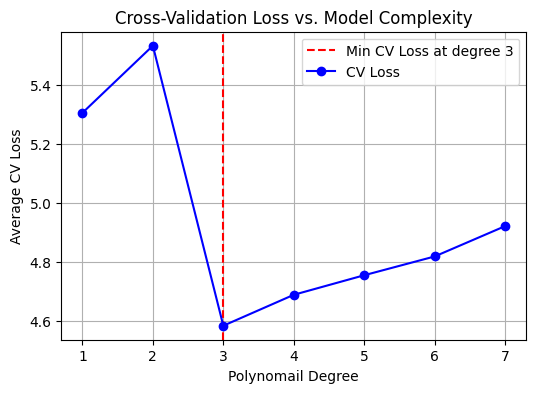

In [15]:
#Checkpoint to visualize the progress so far
coeffs = np.array([1, 0, -5, 0])
n_samples = 100
x_range = (-2, 2)
pos_noise_std = 2
neg_noise_std = 2
random_seed = 42

# Generate the data.
x, y = generate_polynomial_data(n_samples, coeffs, x_range,
                                pos_noise_std, neg_noise_std, polynomial,
                                random_seed=random_seed)

# Degrees to try.
degrees = [1, 2, 3, 4, 5, 6, 7]

# Call the function.
plot_cv_loss_vs_degree(x, y, degrees, mse_loss, k=10, random_seed=42, fig_size=(6, 4))
